In [1]:
import numpy as np
import jPCA
import matplotlib.pyplot as plt
from jPCA.util import load_churchland_data, plot_projections

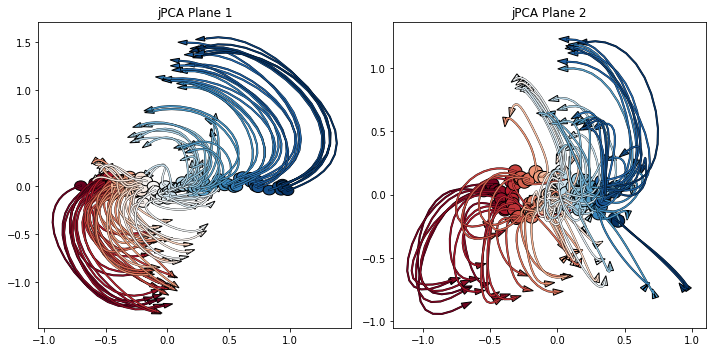

In [2]:
# Load publicly available data from Mark Churchland's group
path = "/Users/Bantin/Documents/Stanford/Linderman-Shenoy/jPCA_ForDistribution/exampleData.mat"
datas, times = load_churchland_data(path)

# Create a jPCA object
jpca = jPCA.JPCA(num_jpcs=6)

# Fit the jPCA object to data
(projected, 
 full_data_var,
 pca_var_capt,
 jpca_var_capt,
 R2_Mskew,
 R2_Unconstrained) = jpca.fit(datas, times=times, tstart=-50, tend=150)

# Plot the projected data
# x_idx and y_idx control which columns of the data are shown.
# For example, to plot the second jPCA plane, use x_idx=2, y_idx=3
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plot_projections(projected, axis=axes[0], x_idx=0, y_idx=1)
plot_projections(projected, axis=axes[1], x_idx=2, y_idx=3)

axes[0].set_title("jPCA Plane 1")
axes[1].set_title("jPCA Plane 2")
plt.tight_layout()
plt.show()

In [3]:
# Here's how we would get the variance of first plane:
print("Variance captured by each jPC:")
jpca_var_capt / full_data_var

Variance captured by each jPC:


array([0.14173993, 0.1470845 , 0.08170865, 0.0774341 , 0.09198514,
       0.07063313])

In [4]:
# Example of getting the eigenvalues of M_skew
print("Eigenvalues of M_skew:")
np.round(np.linalg.eigvals(jpca.M_skew), 3)

Eigenvalues of M_skew:


array([ 0.+0.08j ,  0.-0.08j , -0.+0.048j, -0.-0.048j, -0.+0.008j,
       -0.-0.008j])

In [5]:
# Check R-squared in the 6-dimensional space, and compare
# to R-squared for unconstrained M.
print("R squared in 6 dimensions: ")
R2_Mskew, R2_Unconstrained

(0.48861285877459304, 0.6497744120291534)